## Data Analysis

### Importing libraries

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [47]:
store = pd.read_csv('Data/store.csv');
train_1 = pd.read_csv('Data/train_1.csv');
train_2 = pd.read_csv('Data/train_2.csv');
train = pd.concat([train_1, train_2], axis=0);
train= train.drop(columns=['Unnamed: 0'])
test = pd.read_csv('Data/test.csv')

print('store : ',store.shape)
print('train : ',train.shape)
print('test : ',test.shape)

/home/ghiye/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


store :  (1115, 10)
train :  (1017209, 9)
test :  (41088, 8)


### Data Description

In this section, we will get to know the features of our dataset.

Our data is split in two seperate datasets, `Store` and `Train`. 

- `Store`: contains features that describe the stores, e.g. store type or competition distance.

- `Train`: contains informations about the sales, number of customers, etc.. of each stores.

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- **Id**: an Id that represents a (Store, Date) tuple within the test set.


- **Store**: a unique Id for each store.


- **Sales**: the turnover for any given day.


- **Customers**: the number of customers on a given day.


- **Open**: an indicator for whether the store was open: 0 = closed, 1 = open.


- **StateHoliday**: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None


- **SchoolHoliday**: indicates if the (Store, Date) was affected by the closure of public schools.


- **StoreType**: differentiates between 4 different store models: a, b, c, d.


- **Assortment**: describes an assortment level: a = basic, b = extra, c = extended.


- **CompetitionDistance**: distance in meters to the nearest competitor store.


- **CompetitionOpenSince[Month/Year]**: gives the approximate year and month of the time the nearest competitor was opened.


- **Promo**: indicates whether a store is running a promo on that day.


- **Promo2**: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.


- **Promo2Since[Year/Week]**: describes the year and calendar week when the store started participating in Promo2.


- **PromoInterval**: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

In [48]:
def missing_data(df) : 
    """
    Explore the % of NaN values in dataframe df.
    """
    #caculate the total number of Null values for each variable
    total = df.isnull().sum()
    #caculate the percent of missing values
    percent_1 = df.isnull().sum()/df.shape[0]*100
    percent_2 = (round(percent_1, 1))
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data.sort_values(by="%",ascending=False)

### Store

In [49]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [50]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [51]:
missing_data(store)

,Total,%
Promo2SinceWeek,544,48.8
Promo2SinceYear,544,48.8
PromoInterval,544,48.8
CompetitionOpenSinceMonth,354,31.7
CompetitionOpenSinceYear,354,31.7
CompetitionDistance,3,0.3
Store,0,0.0
StoreType,0,0.0
Assortment,0,0.0
Promo2,0,0.0


As we can see above, the missing values of the first 5 features are imortant ($\approx 50\%$), thus they might not be useful in our case, and probably we will drop them.

In [52]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

Mostly, all of the features are categorical. we can use for example `pd.get_dummies` to get the OneHot encoding of these features and to eliminate orders between features.

### Train

In [53]:
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 508604
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [55]:
missing_data(train)

,Total,%
Store,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Sales,0,0.0
Customers,0,0.0
Open,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0


There is no missing values in `train.csv`, thus all features can be used for prediction.

In [56]:
train.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

## Data Exploration

#### Day of the week

First, we want to see the change in sales during the 7 days of the week, for that we will simply take the daily average of sales for each day of the week.

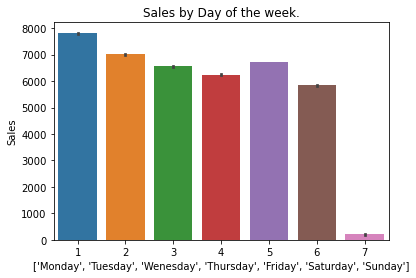

In [57]:
plt.figure()
plt.title('Sales by Day of the week.')
labels = ['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x='DayOfWeek', y='Sales', data=train)
ax.set_xlabel(labels)
plt.show()

From the plot above, we can notice that, on average, the most sales occurs during Mondays. It decreases during the week with a slight peak again in Friday.

Also, we notice that sales drop on Sundays. This is expected, since in general the stores are normally closed during that day.

Let us verify our hypothesis based and validate if it is indeed the case that the stores are closed during Sundays.

In [58]:
sundays_close = train.iloc[np.where(train['DayOfWeek']==7)]['Open'].value_counts()
sundays_close

0    141137
1      3593
Name: Open, dtype: int64

In [59]:
print("{0:.2f}% of the time, the stores are closed on Sundays".format(100*sundays_close[0]/sundays_close.sum()))

97.52% of the time, the stores are closed on Sundays


We can see that most of Sundays, the store is closed. This is why the sales drop during this day.

#### Open/Closed days

Next we will examin the `Open` feature which is the indicator weither the store is open or not.

For example, we want to make sure that no sales occur during closed days (e.g. e-commerce sites can still have sales during closed days).

In [60]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("0 sales during closed days: " + str(not_open.size == 0))

0 sales during closed days: True


In [61]:
train.groupby('Open')['Sales'].mean()

Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64

Since our goal is to estimate the sales of each store, we won't be interested in closed days were sales are zero.

Thus, we can eliminate the days when the stores where closed to not affect our prediction.

#### Customers

We will examine the average number of customers per days of the week.

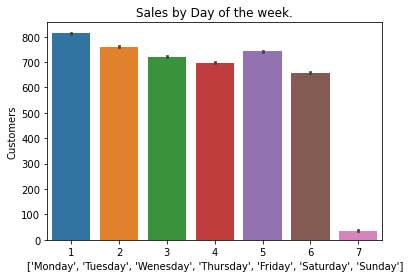

In [62]:
plt.figure()
plt.title('Sales by Day of the week.')
labels = ['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x='DayOfWeek', y='Customers', data=train)
ax.set_xlabel(labels)
plt.show()

It shows similar results to Sales per day of weeks, and this is expected again, since the number of customers is positively correlated with sales growth.

#### Customers & Sales

Let's verify this correlation between `Customers` and `Sales`.

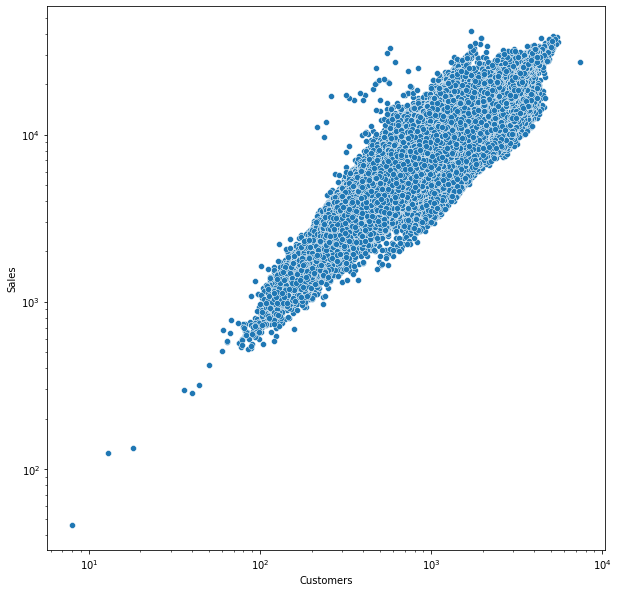

In [63]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

sns.scatterplot(x="Customers", y="Sales",ax=ax, data=train[train.Sales != 0 & train.Customers]);

It is normal that Sales will grow with Customers. hence a positive linear correlation exist between these two variables.

#### Promo Days

Now, we will examine more the average sales in function of promo days.

In [64]:
sales_by_promo = train.groupby('Promo')["Sales"].mean()

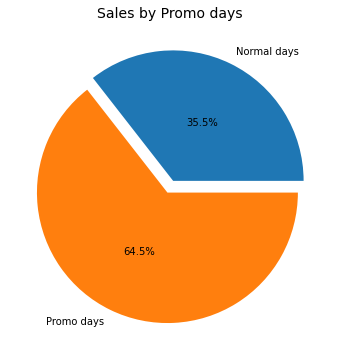

In [65]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Normal days', 'Promo days']
plt.pie(x=sales_by_promo, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Sales by Promo days", fontsize=14);

#### School holidays

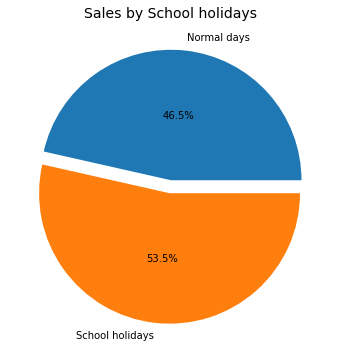

In [66]:
sales_by_schoolh = train.groupby('SchoolHoliday')["Sales"].mean()
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Normal days', 'School holidays']
plt.pie(x=sales_by_schoolh, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Sales by School holidays", fontsize=14);

#### State Holidays

In [67]:
sales_by_stateh = train.groupby('StateHoliday')["Sales"].mean()
sales_by_stateh[0] += sales_by_stateh['0']
sales_by_stateh.drop(['0'], inplace=True)

In [68]:
labels = ['Normal Days', 'Public holiday', 'Easter holiday', 'Christmas']

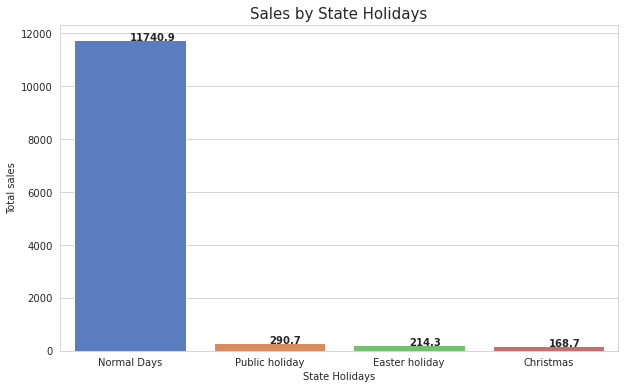

In [69]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=labels, y=sales_by_stateh, data=sales_by_stateh, ci=None, palette="muted",orient='v', )
ax.set_title("Sales by State Holidays", fontsize=15)
ax.set_xlabel ("State Holidays")
ax.set_ylabel ("Total sales")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )

#### Sales growth in function of time

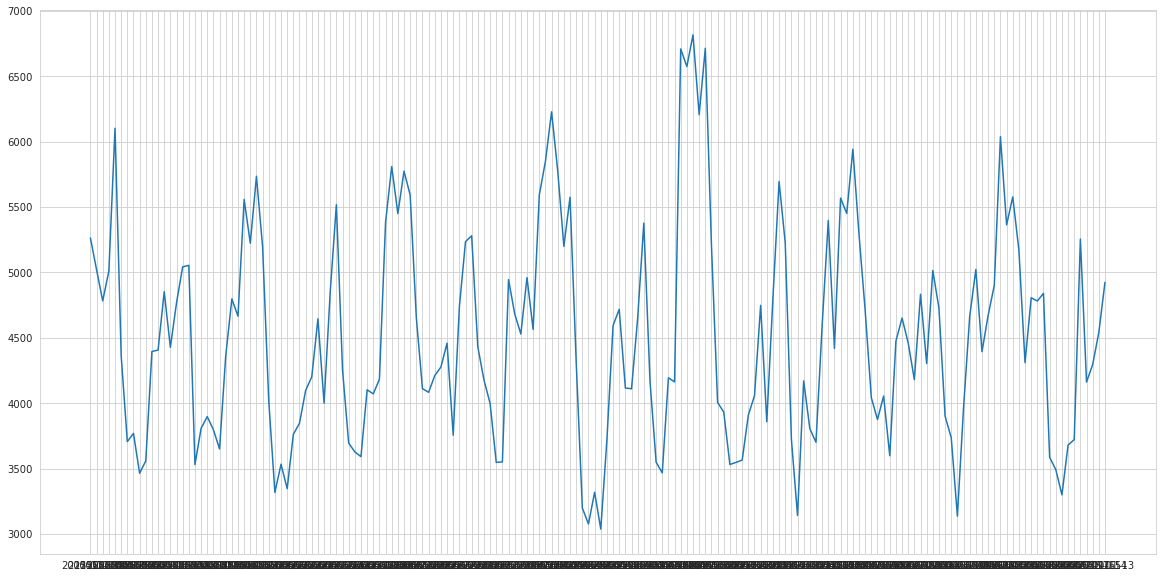

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
df1 = train[train.Store == 1].iloc[:200]
df1 = df1[df1.Sales != 0]
plt.plot(df1['Date'], df1['Sales'])
plt.show()

## Model

### Reading the data

In [71]:
store = pd.read_csv('Data/store.csv');
train_1 = pd.read_csv('Data/train_1.csv');
train_2 = pd.read_csv('Data/train_2.csv');
train = pd.concat([train_1, train_2], axis=0);
train= train.drop(columns=['Unnamed: 0']);
test = pd.read_csv('Data/test.csv');

print('store : ',store.shape)
print('train : ',train.shape)
print('test : ',test.shape)

/home/ghiye/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


store :  (1115, 10)
train :  (1017209, 9)
test :  (41088, 8)


## Merge the databases

In [72]:
df = pd.merge(train, store, how = 'inner', on = 'Store')

In [73]:
missing_data(df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceYear,323348,31.8
CompetitionOpenSinceMonth,323348,31.8
CompetitionDistance,2642,0.3
DayOfWeek,0,0.0
Promo2,0,0.0
Assortment,0,0.0
Store,0,0.0


In [74]:
df = df.drop(['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceYear',
              'CompetitionOpenSinceMonth', 'CompetitionDistance'], axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
 9   StoreType      1017209 non-null  object
 10  Assortment     1017209 non-null  object
 11  Promo2         1017209 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 100.9+ MB


In [76]:
df = df.dropna()

### Feature Engineering

We noticed that each store can be distinguished by its average sales, average customers and on average how much each customer pay.

Therefore, in order to give the model more powerful features that have discriminative power, we decided to add some hand-crafted features that can caracterise the store and helps the model learn to predict its next sales.

We will add three variables:

- Average sales per store.
- Average customers per store.
- Average sales per customer per store.

In [77]:
avg_sales_store = df.groupby('StoreType')['Sales'].mean()

In [78]:
avg_sales = df[['Sales', 'Store']].groupby(["Store"]).mean()
avg_sales.rename(columns=lambda x: 'avg_' + x, inplace=True)

avg_customers = df[['Customers', 'Store']].groupby(["Store"]).mean()
avg_customers.rename(columns=lambda x: 'avg_' + x, inplace=True)

df = pd.merge(avg_sales.reset_index(), df, on='Store')
df = pd.merge(avg_customers.reset_index(), df, on='Store')

df['avg_sales_c'] = df['avg_Sales'] / df['avg_Customers']

In [79]:
df = pd.get_dummies(df, columns=['StoreType','Assortment','StateHoliday', 'DayOfWeek'])

In [80]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# data extraction
df['Year'] = df.Date.dt.year;
df['Month'] = df.Date.dt.month;
df['Day'] = df.Date.dt.day;
df['WeekOfYear'] = df.Date.dt.weekofyear;

<ipython-input-80-2ea91380e0c4>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df.Date.dt.weekofyear;


### Training the model

In [81]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [82]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

date_threshold = df["Date"].max() - pd.DateOffset(weeks=6)
X_train = df.loc[df["Date"] < date_threshold].drop(columns=["Sales", "Date", "Customers"]).reset_index(drop=True)
y_train = df.loc[df["Date"] < date_threshold, "Sales"].reset_index(drop=True)
X_test = df.loc[df["Date"] >= date_threshold].drop(columns=["Sales", "Date", "Customers"]).reset_index(drop=True)
y_test = df.loc[df["Date"] >= date_threshold, "Sales"].reset_index(drop=True)

In [83]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [85]:
xgboost_tree = xgb.XGBRegressor(n_estimators = 500, max_depth = 2)

xgboost_tree.fit(X_train, np.log(1+y_train), 
                 eval_set = [(X_train, np.log(1+y_train)), (X_test, np.log(1+y_test))],
                 eval_metric = "rmse",
                 early_stopping_rounds = 50)

[0]	validation_0-rmse:5.27341	validation_1-rmse:5.39412
[1]	validation_0-rmse:3.69817	validation_1-rmse:3.78553
[2]	validation_0-rmse:2.59743	validation_1-rmse:2.66233
[3]	validation_0-rmse:1.82900	validation_1-rmse:1.87712
[4]	validation_0-rmse:1.29510	validation_1-rmse:1.33085
[5]	validation_0-rmse:0.92590	validation_1-rmse:0.95254
[6]	validation_0-rmse:0.67267	validation_1-rmse:0.69134
[7]	validation_0-rmse:0.50352	validation_1-rmse:0.51497
[8]	validation_0-rmse:0.39310	validation_1-rmse:0.39778
[9]	validation_0-rmse:0.32341	validation_1-rmse:0.32137
[10]	validation_0-rmse:0.28145	validation_1-rmse:0.27392
[11]	validation_0-rmse:0.25509	validation_1-rmse:0.24303
[12]	validation_0-rmse:0.23937	validation_1-rmse:0.22355
[13]	validation_0-rmse:0.22925	validation_1-rmse:0.21577
[14]	validation_0-rmse:0.22200	validation_1-rmse:0.20756
[15]	validation_0-rmse:0.21678	validation_1-rmse:0.20054
[16]	validation_0-rmse:0.21304	validation_1-rmse:0.19540
[17]	validation_0-rmse:0.20969	validation

[144]	validation_0-rmse:0.17649	validation_1-rmse:0.16647
[145]	validation_0-rmse:0.17637	validation_1-rmse:0.16619
[146]	validation_0-rmse:0.17633	validation_1-rmse:0.16616
[147]	validation_0-rmse:0.17628	validation_1-rmse:0.16609
[148]	validation_0-rmse:0.17577	validation_1-rmse:0.16566
[149]	validation_0-rmse:0.17574	validation_1-rmse:0.16559
[150]	validation_0-rmse:0.17568	validation_1-rmse:0.16555
[151]	validation_0-rmse:0.17565	validation_1-rmse:0.16550
[152]	validation_0-rmse:0.17561	validation_1-rmse:0.16547
[153]	validation_0-rmse:0.17560	validation_1-rmse:0.16551
[154]	validation_0-rmse:0.17558	validation_1-rmse:0.16553
[155]	validation_0-rmse:0.17555	validation_1-rmse:0.16553
[156]	validation_0-rmse:0.17524	validation_1-rmse:0.16533
[157]	validation_0-rmse:0.17523	validation_1-rmse:0.16531
[158]	validation_0-rmse:0.17518	validation_1-rmse:0.16536
[159]	validation_0-rmse:0.17507	validation_1-rmse:0.16529
[160]	validation_0-rmse:0.17506	validation_1-rmse:0.16529
[161]	validati

[286]	validation_0-rmse:0.17064	validation_1-rmse:0.16174
[287]	validation_0-rmse:0.17063	validation_1-rmse:0.16172
[288]	validation_0-rmse:0.17061	validation_1-rmse:0.16172
[289]	validation_0-rmse:0.17059	validation_1-rmse:0.16166
[290]	validation_0-rmse:0.17058	validation_1-rmse:0.16165
[291]	validation_0-rmse:0.17058	validation_1-rmse:0.16162
[292]	validation_0-rmse:0.17055	validation_1-rmse:0.16159
[293]	validation_0-rmse:0.17054	validation_1-rmse:0.16159
[294]	validation_0-rmse:0.17050	validation_1-rmse:0.16171
[295]	validation_0-rmse:0.17050	validation_1-rmse:0.16170
[296]	validation_0-rmse:0.17047	validation_1-rmse:0.16169
[297]	validation_0-rmse:0.17046	validation_1-rmse:0.16165
[298]	validation_0-rmse:0.17039	validation_1-rmse:0.16167
[299]	validation_0-rmse:0.17033	validation_1-rmse:0.16156
[300]	validation_0-rmse:0.17030	validation_1-rmse:0.16151
[301]	validation_0-rmse:0.17027	validation_1-rmse:0.16150
[302]	validation_0-rmse:0.17019	validation_1-rmse:0.16155
[303]	validati

[428]	validation_0-rmse:0.16692	validation_1-rmse:0.15906
[429]	validation_0-rmse:0.16689	validation_1-rmse:0.15903
[430]	validation_0-rmse:0.16688	validation_1-rmse:0.15899
[431]	validation_0-rmse:0.16687	validation_1-rmse:0.15898
[432]	validation_0-rmse:0.16686	validation_1-rmse:0.15899
[433]	validation_0-rmse:0.16684	validation_1-rmse:0.15901
[434]	validation_0-rmse:0.16682	validation_1-rmse:0.15901
[435]	validation_0-rmse:0.16675	validation_1-rmse:0.15902
[436]	validation_0-rmse:0.16674	validation_1-rmse:0.15902
[437]	validation_0-rmse:0.16674	validation_1-rmse:0.15903
[438]	validation_0-rmse:0.16674	validation_1-rmse:0.15903
[439]	validation_0-rmse:0.16670	validation_1-rmse:0.15894
[440]	validation_0-rmse:0.16667	validation_1-rmse:0.15899
[441]	validation_0-rmse:0.16666	validation_1-rmse:0.15899
[442]	validation_0-rmse:0.16666	validation_1-rmse:0.15899
[443]	validation_0-rmse:0.16665	validation_1-rmse:0.15898
[444]	validation_0-rmse:0.16664	validation_1-rmse:0.15898
[445]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
np.exp(xgboost_tree.predict(X_test))-1

array([6.9674082e+03, 6.3979258e+03, 5.5371577e+03, ..., 4.7233820e-02,
       5.7858281e+03, 7.3130713e+03], dtype=float32)

In [88]:
y_test

array([5263, 5020, 4782, ...,    0, 7824, 8291])

In [93]:
y_pred = np.exp(xgboost_tree.predict(X_test)) - 1

In [95]:
final_df = df.loc[df["Date"] >= date_threshold].reset_index(drop=True)

In [96]:
final_df['Sales_prediction'] = y_pred

In [98]:
final_df.to_csv('final_prediction', index=False)